NAME - VAISHNAVI PATIL
PRN - 21070126108
BRANCH - AIML

In [6]:
#IMPORTED ALL THE NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from statsmodels.tsa.arima.model import ARIMA


In [7]:
 #LOAD THE DATASET
 df=pd.read_csv('/content/DS_ML Coding Challenge Dataset (1).xlsx - Training Dataset.csv')

In [8]:

 df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [9]:
df.tail()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
499765,NTM1,X2,A12,DIRECT,Large,Powder,Nov-20,18.20
499766,NTM2,X1,A28,DIRECT,Large,Powder,Dec-20,199.47
499767,NTM2,X1,A5,DIRECT,Large,Powder,Oct-20,135.27
499768,NTM3,X1,A44,DIRECT,Small,Liquid,May-21,66.87
499769,NTM2,X1,A10,ECOM,Large,Powder,Mar-21,160.04


sanity check of data

In [10]:
df.shape

(499770, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499770 entries, 0 to 499769
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        499770 non-null  object 
 1   Manufacturer       499770 non-null  object 
 2   Area Code          499770 non-null  object 
 3   Sourcing Channel   499770 non-null  object 
 4   Product Size       499770 non-null  object 
 5   Product Type       499770 non-null  object 
 6   Month of Sourcing  499770 non-null  object 
 7   Sourcing Cost      499770 non-null  float64
dtypes: float64(1), object(7)
memory usage: 30.5+ MB


In [12]:
df.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [13]:
df.isnull().sum()/df.shape[0]*100

ProductType          0.0
Manufacturer         0.0
Area Code            0.0
Sourcing Channel     0.0
Product Size         0.0
Product Type         0.0
Month of Sourcing    0.0
Sourcing Cost        0.0
dtype: float64

In [14]:
df.duplicated().sum()

492415

In [15]:
for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())
  print("***"*10)


ProductType
NTM2    215011
NTM1    177929
NTM3    106830
Name: count, dtype: int64
******************************
Manufacturer
X1    383234
X2    108116
X3      8420
Name: count, dtype: int64
******************************
Area Code
A28    37643
A7     34649
A3     29167
A11    27418
A8     26409
A44    23482
A10    21357
A5     21290
A25    18411
A29    16732
A31    16290
A16    13980
A2     13145
A12    12770
A40    12108
A21    11753
A6     11618
A43    11593
A4     11326
A1     11117
A18    10154
A9     10107
A24     9395
A22     8420
A35     8370
A14     8227
A45     7552
A13     6620
A42     5695
A33     5067
A15     4820
A32     4819
A36     4264
A34     4249
A19     3839
A38     2739
A30     2357
A20     2126
A26     2077
A46     1732
A39     1702
A37     1432
A17     1139
A23      492
A41      118
Name: count, dtype: int64
******************************
Sourcing Channel
DIRECT       410605
RETAIL        53994
ECOM          29729
WHOLESALE      5442
Name: count, dtype: int64
**

In [16]:
#descriptive statistics
df.describe()

,Sourcing Cost
count,499770.000000
mean,109.201807
std,100.656006
min,-196.070000
25%,57.590000
50%,132.760000
75%,146.340000
max,32632.500000


In [17]:
df.describe(include="object")

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing
count,499770,499770,499770,499770,499770,499770,499770
unique,3,3,45,4,3,2,11
top,NTM2,X1,A28,DIRECT,Large,Powder,Nov-20
freq,215011,383234,37643,410605,297899,426851,55015


Exploratory Data Analysis

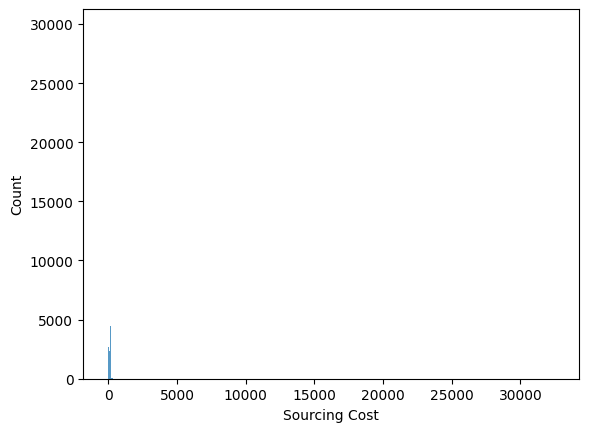

In [18]:
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

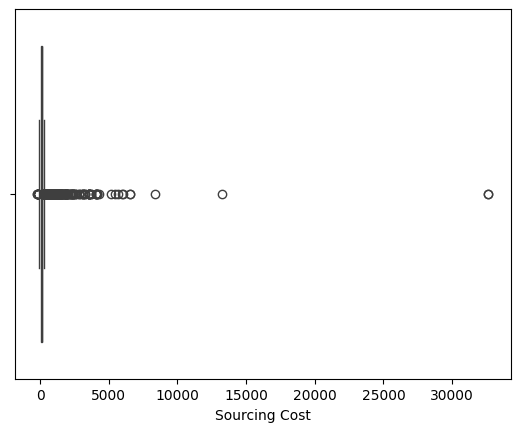

In [19]:
#boxplot
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()


In [20]:
df.select_dtypes(include="number").columns

Index(['Sourcing Cost'], dtype='object')

In [21]:
s=df.select_dtypes(include="number").corr()

<Axes: >

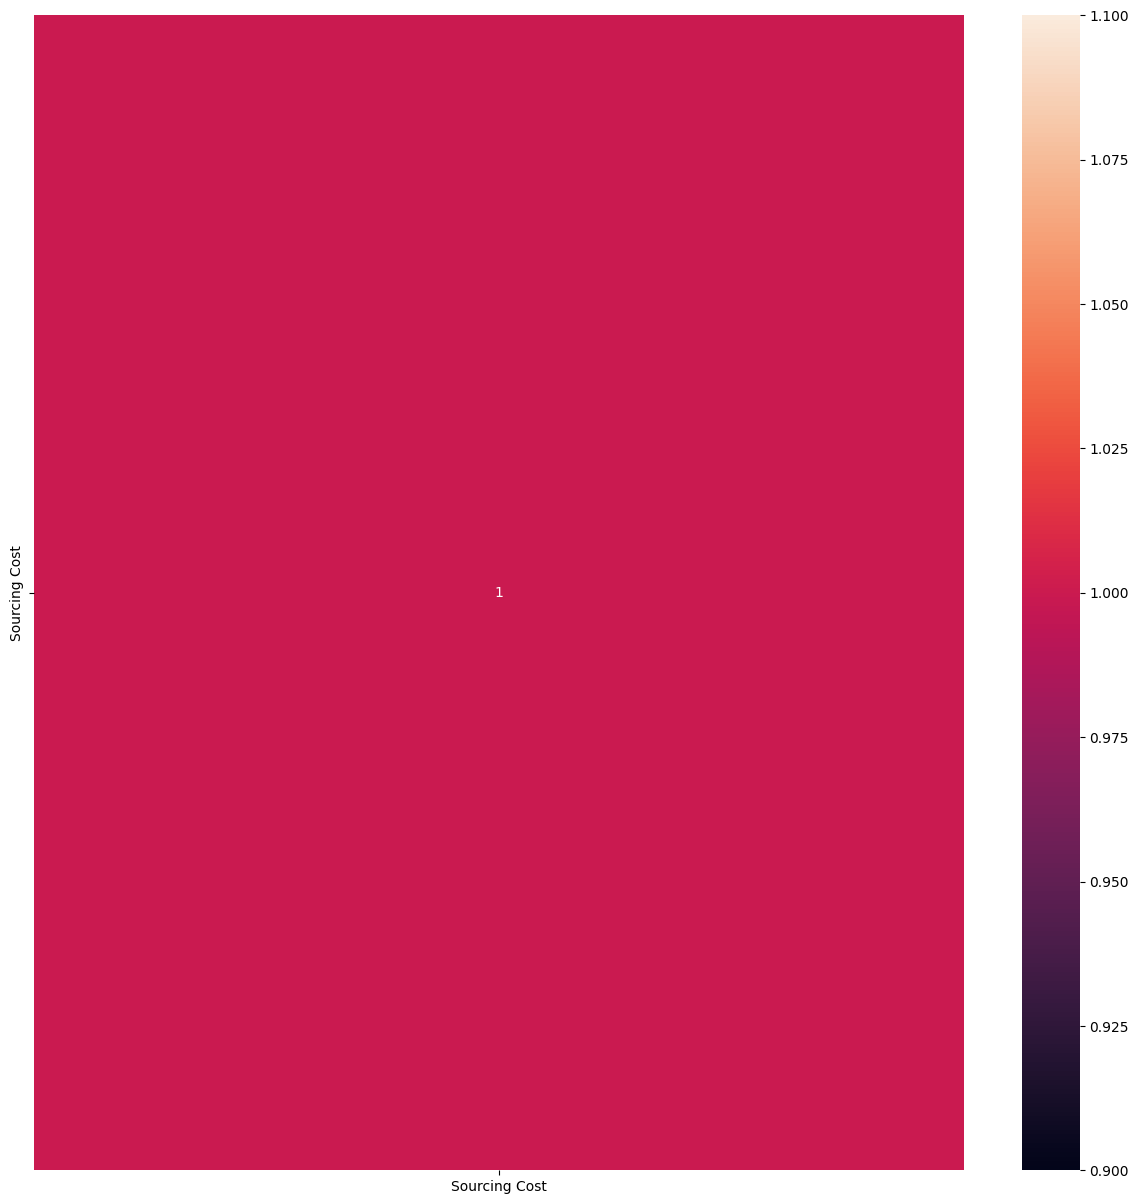

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)


missing value treatment


In [23]:
from sklearn.impute import KNNImputer
impute=KNNImputer()

In [24]:
for i in df.select_dtypes(include="number").columns:
  df[i]=impute.fit_transform(df[[i]])

In [25]:
df.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

outliers treatment


In [26]:
def whisker(col):
  q1,q3=np.percentitle(col,[25,75])
  iqr=q3-q1
  lw=q1-1.5*iqr
  uw=q3+1.5*iqr
  return lw,uw

In [28]:
df.columns

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost'],
      dtype='object')

In [29]:
df.drop_duplicates()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76
...,...,...,...,...,...,...,...,...
491502,NTM2,X2,A32,RETAIL,Small,Powder,Mar-21,0.00
491862,NTM3,X1,A44,DIRECT,Small,Liquid,Nov-20,0.00
495947,NTM2,X2,A44,RETAIL,Large,Powder,Jul-20,42.00
496791,NTM2,X1,A38,DIRECT,Small,Powder,Feb-21,0.00


One Hot Encoding of data


In [30]:
dummy = pd.get_dummies(data=df,columns=["ProductType",	"Manufacturer",	"Area Code",	"Sourcing Channel",	"Product Size","Product Type"	, "Month of Sourcing"],drop_first=True)

In [31]:
dummy

,Sourcing Cost,ProductType_NTM2,ProductType_NTM3,Manufacturer_X2,Manufacturer_X3,Area Code_A10,Area Code_A11,Area Code_A12,Area Code_A13,Area Code_A14,...,Month of Sourcing_Aug-20,Month of Sourcing_Dec-20,Month of Sourcing_Feb-21,Month of Sourcing_Jan-21,Month of Sourcing_Jul-20,Month of Sourcing_Mar-21,Month of Sourcing_May-21,Month of Sourcing_Nov-20,Month of Sourcing_Oct-20,Month of Sourcing_Sep-20
0,10.16,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,134.28,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,12.46,False,True,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,107.22,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,197.76,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499765,18.20,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
499766,199.47,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
499767,135.27,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
499768,66.87,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [32]:
X = df.drop(columns=["ProductType","Manufacturer",	"Area Code",	"Sourcing Channel",	"Product Size","Product Type"	, "Month of Sourcing"])  # Features
y = df['Sourcing Cost']  # Target variable

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499770 entries, 0 to 499769
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        499770 non-null  object 
 1   Manufacturer       499770 non-null  object 
 2   Area Code          499770 non-null  object 
 3   Sourcing Channel   499770 non-null  object 
 4   Product Size       499770 non-null  object 
 5   Product Type       499770 non-null  object 
 6   Month of Sourcing  499770 non-null  object 
 7   Sourcing Cost      499770 non-null  float64
dtypes: float64(1), object(7)
memory usage: 30.5+ MB


In [35]:
df_encod = df.copy()
object_features = df_encod.select_dtypes(include="object").columns.tolist()
print("Total object data type features : ", len(object_features))
print("Features: \n ", object_features )

Total object data type features :  7
Features: 
  ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']


In [36]:
df_encod[object_features].head(2)

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20


In [37]:
df_encod = pd.get_dummies(df_encod, columns=object_features, prefix=object_features, drop_first=True)

In [38]:
df_encod["Sourcing Cost"].value_counts()

Sourcing Cost
0.00      13953
56.52     10383
133.30     4132
186.62     3367
143.92     3059
          ...  
128.98        1
131.68        1
145.61        1
131.98        1
52.94         1
Name: count, Length: 4515, dtype: int64

In [39]:
print(df_encod.columns)


Index(['Sourcing Cost', 'ProductType_NTM2', 'ProductType_NTM3',
       'Manufacturer_X2', 'Manufacturer_X3', 'Area Code_A10', 'Area Code_A11',
       'Area Code_A12', 'Area Code_A13', 'Area Code_A14', 'Area Code_A15',
       'Area Code_A16', 'Area Code_A17', 'Area Code_A18', 'Area Code_A19',
       'Area Code_A2', 'Area Code_A20', 'Area Code_A21', 'Area Code_A22',
       'Area Code_A23', 'Area Code_A24', 'Area Code_A25', 'Area Code_A26',
       'Area Code_A28', 'Area Code_A29', 'Area Code_A3', 'Area Code_A30',
       'Area Code_A31', 'Area Code_A32', 'Area Code_A33', 'Area Code_A34',
       'Area Code_A35', 'Area Code_A36', 'Area Code_A37', 'Area Code_A38',
       'Area Code_A39', 'Area Code_A4', 'Area Code_A40', 'Area Code_A41',
       'Area Code_A42', 'Area Code_A43', 'Area Code_A44', 'Area Code_A45',
       'Area Code_A46', 'Area Code_A5', 'Area Code_A6', 'Area Code_A7',
       'Area Code_A8', 'Area Code_A9', 'Sourcing Channel_ECOM',
       'Sourcing Channel_RETAIL', 'Sourcing Chann

In [40]:
df.dtypes

ProductType           object
Manufacturer          object
Area Code             object
Sourcing Channel      object
Product Size          object
Product Type          object
Month of Sourcing     object
Sourcing Cost        float64
dtype: object

In [41]:
df["ProductType"].unique()

array(['NTM3', 'NTM2', 'NTM1'], dtype=object)

In [42]:
ohe = OneHotEncoder()

In [43]:
print(ohe)

OneHotEncoder()


In [44]:
ohe.fit_transform(df[["ProductType","Manufacturer",	"Area Code",	"Sourcing Channel",	"Product Size","Product Type"	, "Month of Sourcing" ]]).toarray()

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [45]:
feature_arry = ohe.fit_transform(df[["ProductType","Manufacturer",	"Area Code",	"Sourcing Channel",	"Product Size","Product Type"	, "Month of Sourcing" ]]).toarray()

In [46]:
ohe.categories_

[array(['NTM1', 'NTM2', 'NTM3'], dtype=object),
 array(['X1', 'X2', 'X3'], dtype=object),
 array(['A1', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17',
        'A18', 'A19', 'A2', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25',
        'A26', 'A28', 'A29', 'A3', 'A30', 'A31', 'A32', 'A33', 'A34',
        'A35', 'A36', 'A37', 'A38', 'A39', 'A4', 'A40', 'A41', 'A42',
        'A43', 'A44', 'A45', 'A46', 'A5', 'A6', 'A7', 'A8', 'A9'],
       dtype=object),
 array(['DIRECT', 'ECOM', 'RETAIL', 'WHOLESALE'], dtype=object),
 array(['ExtraLarge', 'Large', 'Small'], dtype=object),
 array(['Liquid', 'Powder'], dtype=object),
 array(['Apr-21', 'Aug-20', 'Dec-20', 'Feb-21', 'Jan-21', 'Jul-20',
        'Mar-21', 'May-21', 'Nov-20', 'Oct-20', 'Sep-20'], dtype=object)]

In [48]:
df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [49]:
for col in df.columns:
  print(col, ':' ,len(df[col].unique()), 'labels')

ProductType : 3 labels
Manufacturer : 3 labels
Area Code : 45 labels
Sourcing Channel : 4 labels
Product Size : 3 labels
Product Type : 2 labels
Month of Sourcing : 11 labels
Sourcing Cost : 4515 labels


In [50]:
pd.get_dummies(df, drop_first=True).shape

(499770, 65)

In [51]:
df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [52]:
len(df)

499770

In [53]:
df.dtypes

ProductType           object
Manufacturer          object
Area Code             object
Sourcing Channel      object
Product Size          object
Product Type          object
Month of Sourcing     object
Sourcing Cost        float64
dtype: object

In [54]:
X = df.drop("Sourcing Cost", axis=1)
y = df["Sourcing Cost"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
#turns catogories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["ProductType","Manufacturer",	"Area Code",	"Sourcing Channel",	"Product Size","Product Type"	, "Month of Sourcing"]
one_hot = OneHotEncoder ( )
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X


<499770x71 sparse matrix of type '<class 'numpy.float64'>'
	with 3498390 stored elements in Compressed Sparse Row format>

In [57]:
pd.DataFrame(transformed_X)

,0
0,"(0, 2)\t1.0\n (0, 3)\t1.0\n (0, 25)\t1.0\n..."
1,"(0, 1)\t1.0\n (0, 3)\t1.0\n (0, 50)\t1.0\n..."
2,"(0, 2)\t1.0\n (0, 4)\t1.0\n (0, 18)\t1.0\n..."
3,"(0, 2)\t1.0\n (0, 3)\t1.0\n (0, 15)\t1.0\n..."
4,"(0, 1)\t1.0\n (0, 3)\t1.0\n (0, 25)\t1.0\n..."
...,...
499765,"(0, 0)\t1.0\n (0, 4)\t1.0\n (0, 9)\t1.0\n ..."
499766,"(0, 1)\t1.0\n (0, 3)\t1.0\n (0, 25)\t1.0\n..."
499767,"(0, 1)\t1.0\n (0, 3)\t1.0\n (0, 46)\t1.0\n..."
499768,"(0, 2)\t1.0\n (0, 3)\t1.0\n (0, 43)\t1.0\n..."


In [58]:
dummies = pd.get_dummies(df[["ProductType","Manufacturer",	"Area Code",	"Sourcing Channel",	"Product Size","Product Type"	, "Month of Sourcing"]])
dummies

,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Area Code_A1,Area Code_A10,Area Code_A11,Area Code_A12,...,Month of Sourcing_Aug-20,Month of Sourcing_Dec-20,Month of Sourcing_Feb-21,Month of Sourcing_Jan-21,Month of Sourcing_Jul-20,Month of Sourcing_Mar-21,Month of Sourcing_May-21,Month of Sourcing_Nov-20,Month of Sourcing_Oct-20,Month of Sourcing_Sep-20
0,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,True,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,True,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499765,True,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
499766,False,True,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
499767,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
499768,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [59]:
model = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC()
}

In [60]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

In [61]:
y_categorical = pd.cut(y, bins=3, labels=['low', 'medium', 'high'])

In [62]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC()
}


In [63]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y_categorical,
                                                    test_size=0.2)

Acuuracy of different ML models

In [64]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy}")

Decision Tree - Accuracy: 0.999989995397883
Random Forest - Accuracy: 0.999989995397883
Logistic Regression - Accuracy: 0.999989995397883
Support Vector Machine - Accuracy: 0.999989995397883


regression time series models

In [65]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.9 MB/s eta 0:00:00


<Axes: >

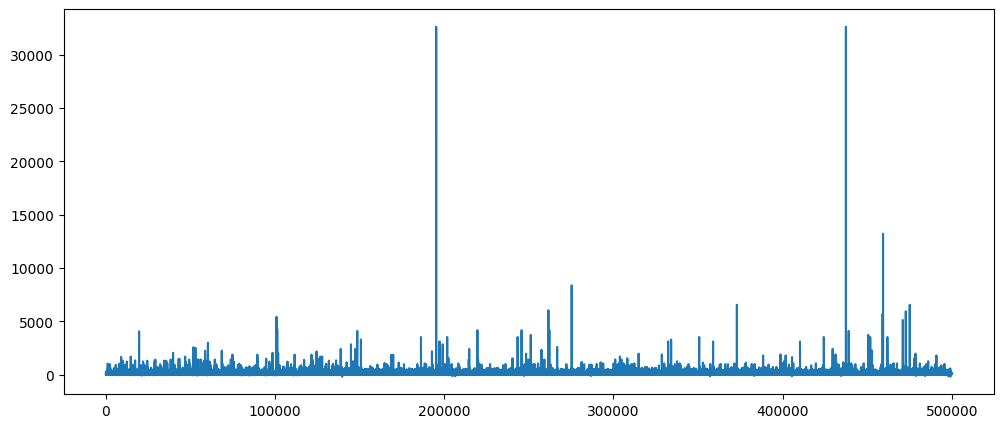

In [66]:
df['Sourcing Cost'].plot(figsize=(12,5))

In [67]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [68]:
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
P_values = range(0, 3)
D_values = range(0, 2)
Q_values = range(0, 3)

In [70]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(499770, 8)
(499740, 8) (30, 8)


In [71]:
#train the model
model=ARIMA(train['Sourcing Cost'], order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Sourcing Cost   No. Observations:               499740
Model:                 ARIMA(1, 0, 5)   Log Likelihood            -3013713.694
Date:                Sat, 11 May 2024   AIC                        6027443.388
Time:                        15:07:14   BIC                        6027532.363
Sample:                             0   HQIC                       6027468.576
                             - 499740                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.2023      0.204    534.663      0.000     108.802     109.603
ar.L1          0.0034      0.383      0.009      0.993      -0.748       0.754
ma.L1          0.0034      0.383      0.009      0.993      -0.748       0.754
ma.L2          0.0062      0.003      2.264      0.024       0.001       0.012
ma.L3          0.0060      0.002      2.422      0.015       0.001       0.011
ma.L4          0.0073      0.002      2.935      0.003       0.002       0.012
ma.L5          0.0047      0.003      1.579      0.114      -0.001       0.011
sigma2      1.013e+04      0.203   4.98e+04      0.000    1.01e+04    1.01e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):    41345337978432.13
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.73   Skew:                           146.59
Prob(H) (two-sided):                  0.00   Kurtosis:                     44562.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
#make prediction on test data set
start=len(train)
end=len(train)+len(test)-1
pred = model.predict(start=start,end=end,typ='levels')
print(pred)
pred.index=df.index[start:end+1]

499740    108.756888
499741    108.254710
499742    107.838761
499743    108.445218
499744    109.031134
499745    109.201673
499746    109.202255
499747    109.202257
499748    109.202257
499749    109.202257
499750    109.202257
499751    109.202257
499752    109.202257
499753    109.202257
499754    109.202257
499755    109.202257
499756    109.202257
499757    109.202257
499758    109.202257
499759    109.202257
499760    109.202257
499761    109.202257
499762    109.202257
499763    109.202257
499764    109.202257
499765    109.202257
499766    109.202257
499767    109.202257
499768    109.202257
499769    109.202257
Name: predicted_mean, dtype: float64


<Axes: >

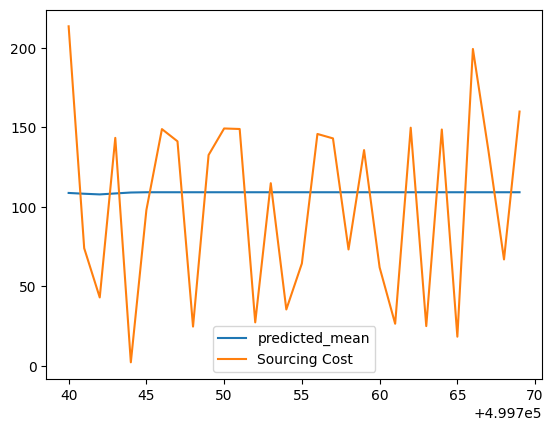

In [75]:
pred.plot(legend=True)
test['Sourcing Cost'].plot(legend=True)

In [76]:
test['Sourcing Cost'].mean()

101.71099999999998

In [77]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Sourcing Cost']))
print(rmse)

58.41794189971545


In [80]:
model2=ARIMA(df['Sourcing Cost'], order=(1,0,5))
model2=model2.fit()
df.tail()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
499765,NTM1,X2,A12,DIRECT,Large,Powder,Nov-20,18.20
499766,NTM2,X1,A28,DIRECT,Large,Powder,Dec-20,199.47
499767,NTM2,X1,A5,DIRECT,Large,Powder,Oct-20,135.27
499768,NTM3,X1,A44,DIRECT,Small,Liquid,May-21,66.87
499769,NTM2,X1,A10,ECOM,Large,Powder,Mar-21,160.04
